#Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#specify the drive/.../filename to read

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Sania
data_df=pd.read_csv("/content/drive/MyDrive/MLBootcamp/Colab_Notebooks/Data/house-prices-advanced-regression-techniques/train.csv")
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Stanley
data_df=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip (Unzipped Files)/train.csv")
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Columns: 288 entries, Id to Heating_Wall
dtypes: float64(3), int64(33), uint8(252)
memory usage: 632.2 KB


In [ ]:
#Shokhruz
data_df=pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Preprocessing

Making a data frame just for PCA and TSNE

Finding out outliers of columns with large variation of data


In [ ]:
#applied get_dummies to all the columns with obj type data
#cols_to_encode = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating']
#ohe = pd.get_dummies(data_df[cols_to_encode])
#data_df = pd.concat([data_df, ohe], axis=1)

In [ ]:
#dropping all the columns we used categorical data
clean_df = data_df.drop(columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating'])

In [ ]:
#combined all the odd columns together
clean_df = clean_df.dropna()

In [ ]:
clean = clean_df
clean_df = clean_df.replace(np.nan, '', regex=True)

In [ ]:
bins = [0, 100000, 150000, 200000, 400000, 500000, 600000, float('inf')]
labels = [0, 1, 2, 3, 4, 5, 6]



clean_df['SalePrice'] = pd.cut(clean_df['SalePrice'], bins=bins, labels=labels, right=False)

unique_buckets = clean_df['SalePrice'].unique()
print("Unique Buckets:", unique_buckets)

Unique Buckets: [3, 2, 1, 0, 4, 5, 6]
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]


In [ ]:
clean_df_X = clean_df.drop(['SalePrice'], axis=1)
clean_df_y = clean_df['SalePrice']

In [ ]:
clean_df_y.head()

0    3
1    2
2    3
3    1
4    3
Name: SalePrice, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

#Running PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = clean_df_X
data.keys()
# Check the output classes
#print(data['SalePrice'])


# Check the input attributes
#print(data['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall'])

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
# Scale data before applying PCA (standard deviation)
scaling_x=StandardScaler()
# Use fit and transform method
scaled_data_x = scaling_x.fit_transform(data)


# Scale data before applying PCA (standard deviation)
scaling_y = StandardScaler()
# Use fit and transform method
scaled_data_y = scaling_y.fit_transform(np.expand_dims(clean_df_y, axis=1))

# Set the n_components=3
principal=PCA(n_components=23) #
pca_x = principal.fit_transform(scaled_data_x) #fitting data into algorithm, output --> vector with reduced deminsionality

# Check the dimensions of data after PCA
print(pca_x.shape)

(1121, 23)


In [ ]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_
#different from linear regression weights

array([[-9.26203010e-03, -2.27642655e-02,  1.80390100e-01,
         1.31805686e-01, -1.12243323e-01,  2.42679720e-01,
         2.12200274e-01,  2.05268443e-01,  1.50062929e-01,
        -1.69133849e-02,  1.18542403e-01,  2.71493122e-01,
         2.72656148e-01,  1.24990593e-01, -4.13890670e-03,
         3.05383663e-01,  8.56078111e-02, -2.44419964e-02,
         2.67915673e-01,  1.13440932e-01,  1.18339550e-01,
        -4.64727005e-03,  2.52310796e-01,  1.79612300e-01,
         2.43480865e-01,  2.96276395e-01,  2.93098803e-01,
         1.42139202e-01,  1.67300572e-01, -8.81115090e-02,
         1.05343646e-02,  2.93221424e-02,  6.07026548e-02,
        -1.56411704e-02,  2.44554513e-02, -8.66326088e-03],
       [ 1.78540252e-02,  1.80014644e-01, -6.16780198e-03,
        -1.58943834e-02,  6.40100564e-02, -2.01188327e-01,
        -1.12728962e-01, -8.29296053e-03, -2.55163351e-01,
        -6.92295335e-02,  6.71706603e-02, -2.24829810e-01,
        -1.72621706e-01,  4.57597912e-01,  9.95497735e-

In [ ]:
listend1 = clean_df_X.columns.tolist()

In [ ]:
x = clean_df.loc[:, listend1].values
y = clean_df.loc[:, 'SalePrice'].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(pca.components_, columns = data.keys())
#pd.DataFrame(data = principalComponents
            # , columns = ['principal component 1', 'principal component 2'])
#finalDf = pd.concat([principalDf, clean_df[['SalePrice']]], axis=1)
#finalDf

In [ ]:
principalDf=principalDf.T

In [ ]:
principalDf

,0,1
Id,-0.009262,0.017881
MSSubClass,-0.022764,0.180029
LotFrontage,0.180390,-0.006186
LotArea,0.131806,-0.015920
OverallCond,-0.112243,0.064010
YearBuilt,0.242680,-0.201196
YearRemodAdd,0.212200,-0.112726
MasVnrArea,0.205268,-0.008283
BsmtFinSF1,0.150063,-0.255156
BsmtFinSF2,-0.016913,-0.069261


In [ ]:
YearBuilt

Text(0, 0.5, 'pc2')

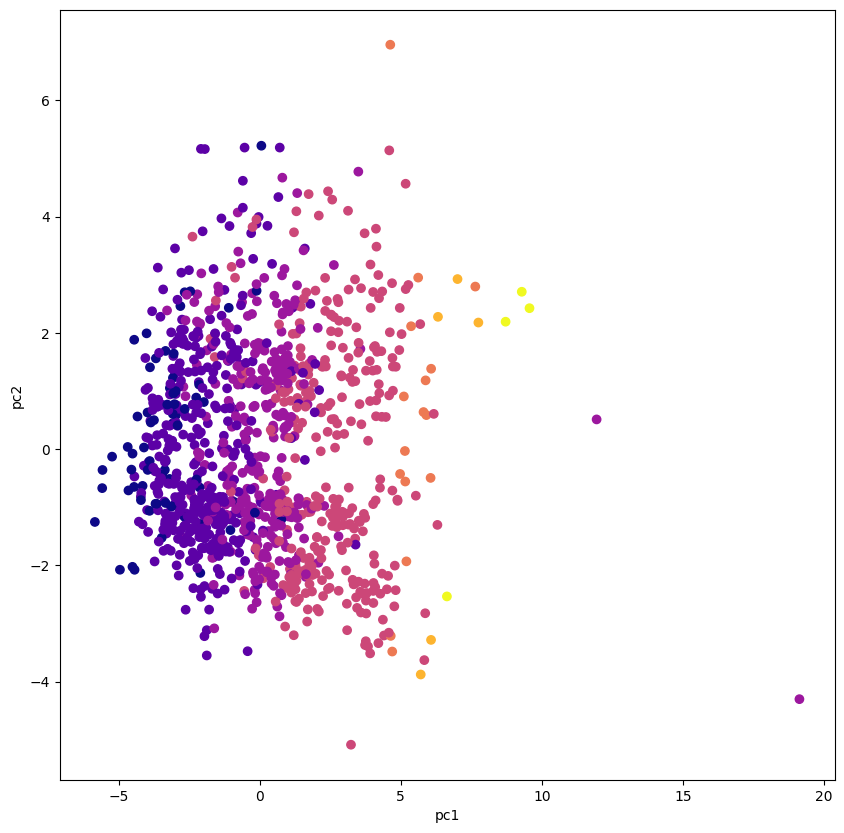

In [ ]:
plt.figure(figsize=(10,10))
#plt.scatter(x[:,0],x[:,1],c=data['pc1'],cmap='plasma')
plt.scatter(pca_x[:,0], pca_x[:,1], c=scaled_data_y, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
#more seperable the datapoints are the more distingusible housing factors are
#what is happening with the data

Text(0.5, 0, 'PC3')

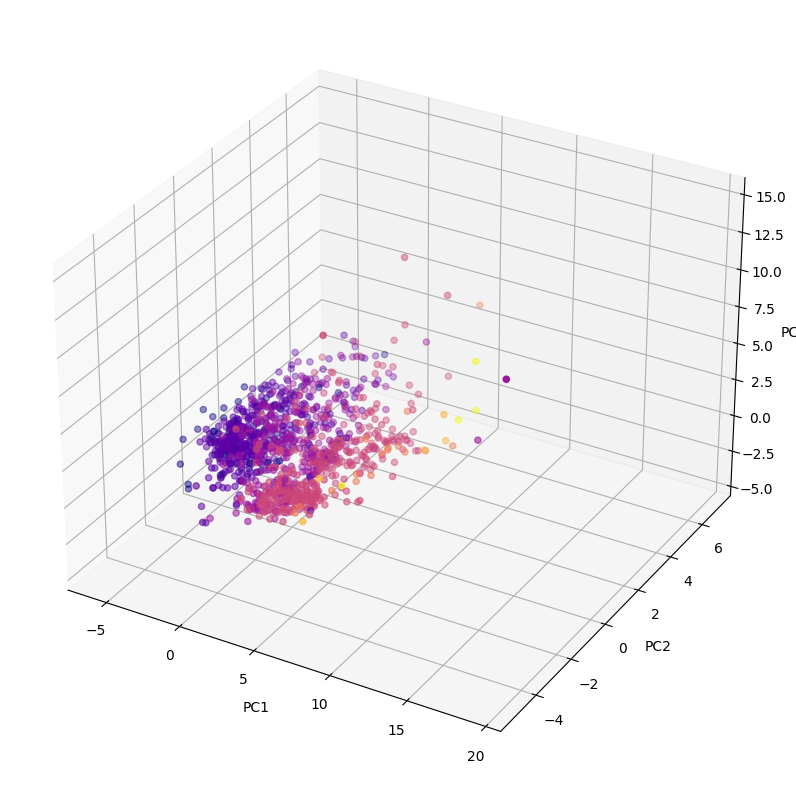

In [ ]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(pca_x[:,0], pca_x[:,1], pca_x[:,2], c=scaled_data_y,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [ ]:
print(principal.explained_variance_ratio_)

[0.1897645  0.0877025  0.07448951 0.0566055  0.04142783 0.03492256
 0.03396444 0.03168124 0.0310139  0.03067289 0.02939985 0.02874607
 0.02841102 0.02541091 0.02512077 0.0246996  0.02337988 0.02190683
 0.02103019 0.02064982 0.01888453 0.01785577 0.01672617]


#TSNEtrial 3 : most scucessful

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

X = pca_x
y = scaled_data_y


In [ ]:
X.shape

y.shape
np.unique(y)
# array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)
# The 10 classes of the images

array([-1.85238826, -0.86497635,  0.12243555,  1.10984746,  2.09725936,
        3.08467127,  4.07208318])

In [ ]:
from sklearn.metrics import pairwise_distances
y_sorted_idc = y.argsort()
X_sorted = X
distance_matrix = pairwise_distances(X, metric='euclidean')

distance_matrix_sorted = pairwise_distances(X_sorted, metric='euclidean')


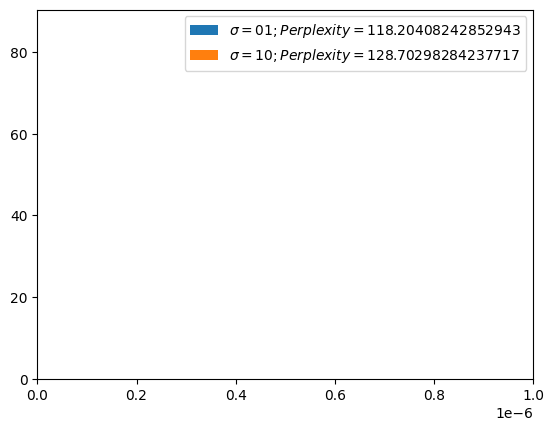

In [ ]:
#esnured that the system detected any outliers present in our data set
from scipy.stats import t, entropy

x = distance_matrix[0,1:]
t_dist_sigma01 = t(df=1.0, loc=0.0, scale=1.0)
t_dist_sigma10 = t(df=1.0, loc=0.0, scale=10.0)
P_01 = t_dist_sigma01.pdf(x)
P_10 = t_dist_sigma10.pdf(x)

perplexity_01 = 2**entropy(P_01)
perplexity_10 = 2**entropy(P_10)

dist_min = min(P_01.min(), P_10.min())
dist_max = max(P_01.max(), P_10.max())
bin_size = (dist_max - dist_min) / 100
bins = np.arange(dist_min+bin_size/2, dist_max+bin_size/2, bin_size)
fig, ax = plt.subplots(1)
ax.hist(P_01, bins=bins)
ax.hist(P_10, bins=bins)
ax.set_xlim((0, 1e-6))
ax.legend((r'$\sigma = 01; Perplexity = $' + str(perplexity_01),
           r'$\sigma = 10; Perplexity = $' + str(perplexity_10)))


In [ ]:
from sklearn.manifold import _t_sne
import numpy as np
import pandas as pd

# Define perplexity and calculate joint probabilities
perplexity = 85  # Same as the default perplexity
p = _t_sne._joint_probabilities(distances=distance_matrix, desired_perplexity=perplexity, verbose=False)

from sklearn.manifold import _t_sne
import numpy as np
import pandas as pd

# Define perplexity and calculate joint probabilities
perplexity = 85  # Same as the default perplexity
p = _t_sne._joint_probabilities(distances=distance_matrix, desired_perplexity=perplexity, verbose=False)

# Create the initial embedding
n_samples = X.shape[0]
n_components = 2
X_embedded = 1e-4 * np.random.randn(n_samples, n_components).astype(np.float32)

embedding_init = X_embedded.ravel()  # Flatten the two-dimensional array to 1D

# Define kwargs for KL divergence
kl_kwargs = {
    'P': p,
    'degrees_of_freedom': 1,
    'n_samples': n_samples,
    'n_components': n_components
}

# Perform gradient descent
embedding_done = _t_sne._gradient_descent(_t_sne._kl_divergence, embedding_init, 0, n_samples, kwargs=kl_kwargs)

# Get the t-SNE components into a 2D array
tsne_result = embedding_done[0].reshape(n_samples, n_components)

# Convert to DataFrame and plot
tsne_result_df = pd.DataFrame({
    'tsne_1': tsne_result[:, 0],
    'tsne_2': tsne_result[:, 1],
    'label': clean_df_y
})


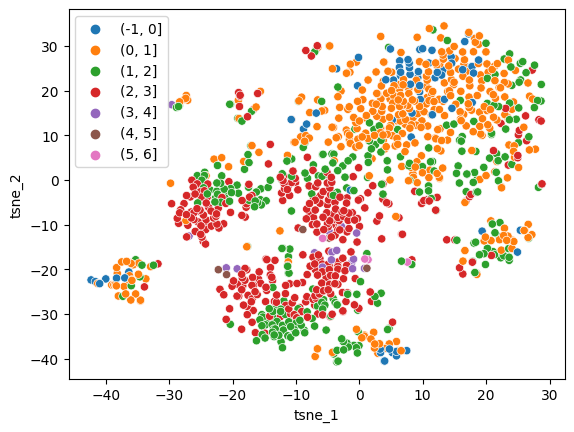

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate price ranges based on the 'SalePrice' column
price_ranges = pd.cut(clean_df_y, bins=[-1, 0, 1, 2, 3, 4, 5, 6])
tsne_result_df['price_range'] = price_ranges

# Scatter plot with price range colors
sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='price_range')

# Add price ranges as legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

plt.show()

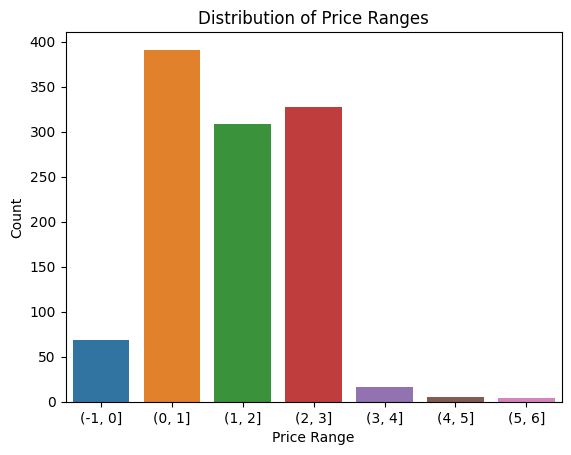

In [ ]:
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges')
plt.show()

In [ ]:
#Finding how many houses are in each range
price_range_counts = tsne_result_df['price_range'].value_counts()
price_ranges = price_range_counts.index.tolist()  # Extract the price ranges
counts = price_range_counts.tolist()  # Extract the counts

# Print the price ranges and their corresponding counts
for range, count in zip(price_ranges, counts):
    print(f"Price Range: {range}, Count: {count}")

Price Range: (0, 1], Count: 391
Price Range: (2, 3], Count: 327
Price Range: (1, 2], Count: 309
Price Range: (-1, 0], Count: 69
Price Range: (3, 4], Count: 16
Price Range: (4, 5], Count: 5
Price Range: (5, 6], Count: 4


In [ ]:
# Create the initial embedding
n_samples = X.shape[0]
n_components = 2
X_embedded = 1e-4 * np.random.randn(n_samples,
                                    n_components).astype(np.float32)

embedding_init = X_embedded.ravel()  # Flatten the two dimensional array to 1D

# kl_kwargs defines the arguments that are passed down to _kl_divergence
kl_kwargs = {'P': p,
             'degrees_of_freedom': 1,
             'n_samples': 1121,
             'n_components':2}
# Perform gradient descent
embedding_done = _t_sne._gradient_descent(_t_sne._kl_divergence,
                                          embedding_init,
                                          0,
                                          2242,
                                          kwargs=kl_kwargs)

# Get first and second TSNE components into a 2D array
tsne_result = embedding_done[0].reshape(1121,2)

In [ ]:
# Convert do DataFrame and plot
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0],
                               'tsne_2': tsne_result[:,1],
                               'label': clean_df_y})

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)